In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_frame = pd.read_csv("Spread-of-Disease-population-density-table.csv", 
                        header=6, 
                        names=["run", 
                              "variant", 
                              "connections_per_node", 
                              "num_agents", 
                              "num_infected", 
                              "disease_decay", 
                              "step", 
                              "ticks"])

In [3]:
data_frame.head()

,run,variant,connections_per_node,num_agents,num_infected,disease_decay,step,ticks
0,4,"""mobile""",4.1,50,1,0,304,304
1,2,"""mobile""",4.1,50,1,0,338,338
2,3,"""mobile""",4.1,50,1,0,469,469
3,5,"""mobile""",4.1,50,1,0,363,363
4,6,"""mobile""",4.1,50,1,0,353,353


In [53]:
analysis = pd.DataFrame({ 'mean' : data_frame.groupby(["num_agents"]).mean().ticks.values, 
                          'std' : data_frame.groupby(["num_agents"]).std().ticks.values, 
                          'sem' : data_frame.groupby(["num_agents"]).sem().ticks.values }, 
                          index = data_frame.num_agents.unique())

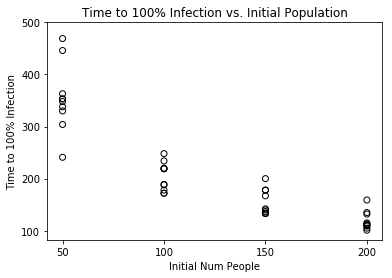

In [54]:
plt.scatter(data_frame.num_agents, data_frame.ticks, facecolors='none', edgecolors='k')
plt.xticks(data_frame.num_agents.unique())
plt.yticks(np.arange(100, 600, 100))
plt.title('Time to 100% Infection vs. Initial Population')
plt.ylabel('Time to 100% Infection')
plt.xlabel('Initial Num People')
plt.show()

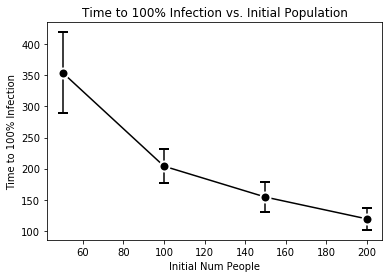

In [55]:
plt.errorbar(analysis.index, analysis['mean'], yerr=analysis['std'], 
             marker='o', color='k', capsize=5, ms=10, mew=2, mec='white')
plt.title('Time to 100% Infection vs. Initial Population')
plt.ylabel('Time to 100% Infection')
plt.xlabel('Initial Num People')
plt.show()

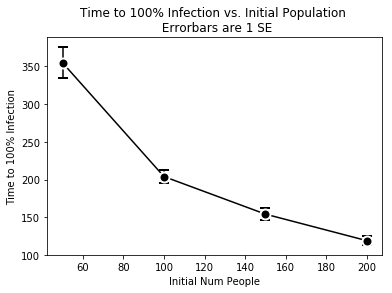

In [56]:
plt.errorbar(analysis.index, analysis['mean'], yerr=analysis['sem'], 
             marker='o', color='k', capsize=5, ms=10, mew=2, mec='white')
plt.title('Time to 100% Infection vs. Initial Population \n Errorbars are 1 SE')
plt.ylabel('Time to 100% Infection')
plt.xlabel('Initial Num People')
plt.show()